Loading MNIST Dataset

In [107]:
from keras import models, layers, optimizers, datasets, utils, losses
import numpy as np

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Data preprocessing


In [108]:
train_size=1024
test_size=1024

In [109]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255
x_train = x_train[:train_size,:]
x_test = x_test[:test_size,:]
y_train = y_train[:train_size]
y_test = y_test[:test_size]
print(y_train.shape)
print(x_train.shape)

(1024,)
(1024, 784)


In [110]:
import numpy as np
y_train_binary = np.empty((train_size,8))
counter =0 
for y in y_train:
  ascii_y = ord(str(y))
  binary_y = '{0:08b}'.format(ascii_y)
  binary_y = np.array([int(str_y) for str_y in list(binary_y)])
  y_train_binary[counter]=binary_y
  counter+=1
print(y_train[0])
print(y_train_binary[0])

5
[0. 0. 1. 1. 0. 1. 0. 1.]


In [111]:
y_test_binary = np.empty((test_size,8))
counter =0 
for y in y_test:
  ascii_y = ord(str(y))
  binary_y = '{0:08b}'.format(ascii_y)
  binary_y = np.array([int(str_y) for str_y in list(binary_y)])
  y_test_binary[counter]=binary_y
  counter+=1
print(y_test[0])
print(y_test_binary[0])

7
[0. 0. 1. 1. 0. 1. 1. 1.]


In [112]:
x_train = x_train.T

x_train = np.append(x_train, [[1]*train_size], axis=0)
print(x_train.shape)

(785, 1024)


In [113]:
x_test = x_test.T
x_test = np.append(x_test, [[1]*test_size], axis=0)

**Baseline model**

Learning rate of 0.1 and momentum of 0.9.Number of trials for training the network was set to 100 initially

# Baseline Model

In [147]:
X=x_train
Y=y_train_binary.T
Ni =785; Nh=40; No=8;
Ntrials=500
alpha = 0.0001
n=train_size
momentum = 0.9

560.0


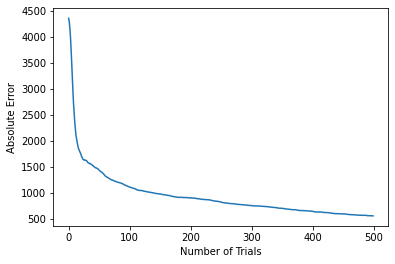

In [148]:
wh=np.random.randn(Nh, Ni);
dwh= np.zeros(wh.shape)
wo=np.random.randn(No,Nh);
dwo=np.zeros(wo.shape)
err=np.array([])
acc=np.array([])
for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))

    do=y*(1-y)*(Y-y)
    dh=h*(1-h)*(wo.transpose()@do)

    dwo=momentum*dwo+do@h.T 
    wo=wo+alpha*dwo 

    dwh=momentum*dwh+dh@X.T 
    wh=wh+alpha*dwh 

    accuCount = np.sum(np.all(Y == np.round(y), axis = 0))
    accuCount =  ((accuCount/train_size))*100;

    err=np.append(err, np.sum(abs(Y-np.round(y))) + L2_regularization)
    acc=np.append(acc, accuCount)

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/train_size))*100;
print(err[-1])
import matplotlib.pyplot as plt
plt.xlabel("Number of Trials")
plt.ylabel("Absolute Error")
plt.plot(err)

60.05859375

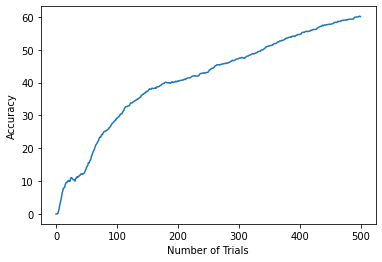

In [152]:
plt.plot(acc)
plt.xlabel("Number of Trials")
plt.ylabel("Accuracy")
acc[-1]

In [150]:
print("err:",err[-1])
print("accuracy:",accuracy)

err: 560.0
accuracy: 60.05859375


# Learning Rate

In [178]:
X=x_train
Y=y_train_binary.T
Ni =785; Nh=40; No=8;
Ntrials=500
alpha = 0.0001
n=train_size
momentum = 0.9

In [179]:
err_alpha1=np.array([])
err_alpha2=np.array([])
err_alpha3=np.array([])
acc_alpha1=np.array([])
acc_alpha2=np.array([])
acc_alpha3=np.array([])

In [180]:
wh=np.random.randn(Nh, Ni);
dwh= np.zeros(wh.shape)
wo=np.random.randn(No,Nh);
dwo=np.zeros(wo.shape)
acc=np.array([])
for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))

    do=y*(1-y)*(Y-y)
    dh=h*(1-h)*(wo.transpose()@do)

    dwo=momentum*dwo+do@h.T 
    wo=wo+alpha*dwo 

    dwh=momentum*dwh+dh@X.T 
    wh=wh+alpha*dwh 

    accuCount = np.sum(np.all(Y == np.round(y), axis = 0))
    accuCount =  ((accuCount/train_size))*100;

    err_alpha1=np.append(err_alpha1, np.sum(abs(Y-np.round(y))))
    acc_alpha1=np.append(acc_alpha1, accuCount)

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/train_size))*100;
print(accuracy)
err_alpha1[-1]

66.796875


463.0

In [181]:
alpha = 0.001

In [182]:
wh=np.random.randn(Nh, Ni);
dwh= np.zeros(wh.shape)
wo=np.random.randn(No,Nh);
dwo=np.zeros(wo.shape)
acc=np.array([])
for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))

    do=y*(1-y)*(Y-y)
    dh=h*(1-h)*(wo.transpose()@do)

    dwo=momentum*dwo+do@h.T 
    wo=wo+alpha*dwo 

    dwh=momentum*dwh+dh@X.T 
    wh=wh+alpha*dwh 

    accuCount = np.sum(np.all(Y == np.round(y), axis = 0))
    accuCount =  ((accuCount/train_size))*100;

    err_alpha2=np.append(err_alpha2, np.sum(abs(Y-np.round(y))))
    acc_alpha2=np.append(acc_alpha2, accuCount)

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/train_size))*100;
print(accuracy)
err_alpha2[-1]

94.82421875


60.0

In [183]:
alpha = 0.01

In [184]:
wh=np.random.randn(Nh, Ni);
dwh= np.zeros(wh.shape)
wo=np.random.randn(No,Nh);
dwo=np.zeros(wo.shape)
acc=np.array([])
for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))

    do=y*(1-y)*(Y-y)
    dh=h*(1-h)*(wo.transpose()@do)

    dwo=momentum*dwo+do@h.T 
    wo=wo+alpha*dwo 

    dwh=momentum*dwh+dh@X.T 
    wh=wh+alpha*dwh 

    accuCount = np.sum(np.all(Y == np.round(y), axis = 0))
    accuCount =  ((accuCount/train_size))*100;

    err_alpha3=np.append(err_alpha3, np.sum(abs(Y-np.round(y))))
    acc_alpha3=np.append(acc_alpha3, accuCount)

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/train_size))*100;
print(accuracy)
err_alpha3[-1]

40.8203125


613.0

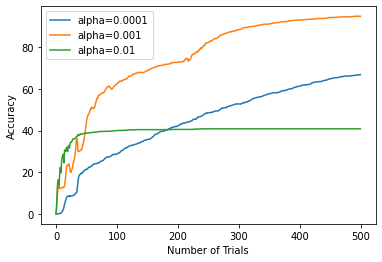

In [190]:
import matplotlib.pyplot as plt
plt.xlabel("Number of Trials")
plt.ylabel("Accuracy")
plt.plot(acc_alpha1)
plt.plot(acc_alpha2)
plt.plot(acc_alpha3)
plt.legend(['alpha=0.0001', 'alpha=0.001', 'alpha=0.01'], loc='upper left')
plt.show()

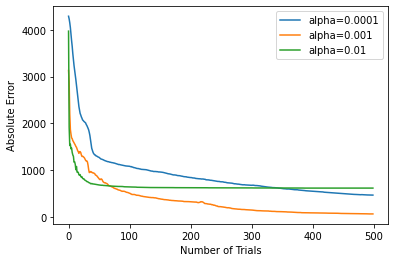

In [191]:
import matplotlib.pyplot as plt
plt.xlabel("Number of Trials")
plt.ylabel("Absolute Error")
plt.plot(err_alpha1)
plt.plot(err_alpha2)
plt.plot(err_alpha3)
plt.legend(['alpha=0.0001', 'alpha=0.001', 'alpha=0.01'], loc='upper right')
plt.show()

# Number of neurons

In [212]:
X=x_train
Y=y_train_binary.T
Ni =785; Nh=40; No=8;
Ntrials=500
alpha = 0.001
n=train_size
momentum = 0.9

In [213]:
err_n1=np.array([])
err_n2=np.array([])
err_n3=np.array([])
acc_n1=np.array([])
acc_n2=np.array([])
acc_n3=np.array([])

In [214]:
wh=np.random.randn(Nh, Ni);
dwh= np.zeros(wh.shape)
wo=np.random.randn(No,Nh);
dwo=np.zeros(wo.shape)
acc=np.array([])
for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))

    do=y*(1-y)*(Y-y)
    dh=h*(1-h)*(wo.transpose()@do)

    dwo=momentum*dwo+do@h.T 
    wo=wo+alpha*dwo 

    dwh=momentum*dwh+dh@X.T 
    wh=wh+alpha*dwh 

    accuCount = np.sum(np.all(Y == np.round(y), axis = 0))
    accuCount =  ((accuCount/train_size))*100;

    err_n1=np.append(err_n1, np.sum(abs(Y-np.round(y))))
    acc_n1=np.append(acc_n1, accuCount)

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/train_size))*100;
print(accuracy)
err_n1[-1]

95.41015625


55.0

In [215]:
Nh=100

In [216]:
wh=np.random.randn(Nh, Ni);
dwh= np.zeros(wh.shape)
wo=np.random.randn(No,Nh);
dwo=np.zeros(wo.shape)
acc=np.array([])
for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))

    do=y*(1-y)*(Y-y)
    dh=h*(1-h)*(wo.transpose()@do)

    dwo=momentum*dwo+do@h.T 
    wo=wo+alpha*dwo 

    dwh=momentum*dwh+dh@X.T 
    wh=wh+alpha*dwh 

    accuCount = np.sum(np.all(Y == np.round(y), axis = 0))
    accuCount =  ((accuCount/train_size))*100;

    err_n2=np.append(err_n2, np.sum(abs(Y-np.round(y))))
    acc_n2=np.append(acc_n2, accuCount)

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/train_size))*100;
print(accuracy)
err_n2[-1]

79.00390625


217.0

In [217]:
Nh=500

In [218]:
wh=np.random.randn(Nh, Ni);
dwh= np.zeros(wh.shape)
wo=np.random.randn(No,Nh);
dwo=np.zeros(wo.shape)
acc=np.array([])
for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))

    do=y*(1-y)*(Y-y)
    dh=h*(1-h)*(wo.transpose()@do)

    dwo=momentum*dwo+do@h.T 
    wo=wo+alpha*dwo 

    dwh=momentum*dwh+dh@X.T 
    wh=wh+alpha*dwh 

    accuCount = np.sum(np.all(Y == np.round(y), axis = 0))
    accuCount =  ((accuCount/train_size))*100;

    err_n3=np.append(err_n3, np.sum(abs(Y-np.round(y))))
    acc_n3=np.append(acc_n3, accuCount)

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/train_size))*100;
print(accuracy)
err_n3[-1]

36.71875


690.0

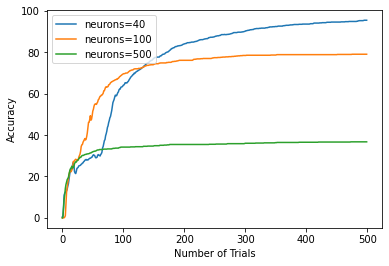

In [219]:
import matplotlib.pyplot as plt
plt.xlabel("Number of Trials")
plt.ylabel("Accuracy")
plt.plot(acc_n1)
plt.plot(acc_n2)
plt.plot(acc_n3)
plt.legend(['neurons=40', 'neurons=100', 'neurons=500'], loc='upper left')
plt.show()

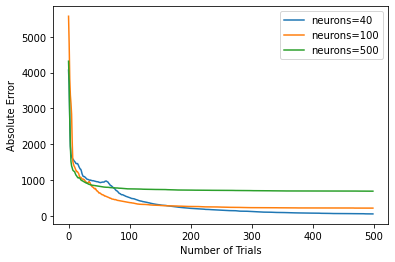

In [221]:
plt.xlabel("Number of Trials")
plt.ylabel("Absolute Error")
plt.plot(err_n1)
plt.plot(err_n2)
plt.plot(err_n3)
plt.legend(['neurons=40', 'neurons=100', 'neurons=500'], loc='upper right')
plt.show()

# Number of layers

In [32]:
X=x_train
Y=y_train_binary.T
Ni =785; Nh=40; No=8;
Ntrials=500
alpha = 0.001
n=train_size
momentum = 0.9

In [33]:
err_l1=np.array([])
err_l3=np.array([])
err_l5=np.array([])
acc_l1=np.array([])
acc_l3=np.array([])
acc_l5=np.array([])

In [34]:
wh=np.random.randn(Nh, Ni);
dwh= np.zeros(wh.shape)
wo=np.random.randn(No,Nh);
dwo=np.zeros(wo.shape)
acc=np.array([])
for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))

    do=y*(1-y)*(Y-y)
    dh=h*(1-h)*(wo.transpose()@do)

    dwo=momentum*dwo+do@h.T 
    wo=wo+alpha*dwo 

    dwh=momentum*dwh+dh@X.T 
    wh=wh+alpha*dwh 

    accuCount = np.sum(np.all(Y == np.round(y), axis = 0))
    accuCount =  ((accuCount/train_size))*100;

    err_l1=np.append(err_l1, np.sum(abs(Y-np.round(y))))
    acc_l1=np.append(acc_l1, accuCount)

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/train_size))*100;
print(accuracy)
err_l1[-1]

77.5390625


244.0

In [35]:
Ni =785; Nh1=40; Nh2=40; Nh3=40; No=8;

In [36]:
wh1=np.random.randn(Nh1, Ni);
dwh1= np.zeros(wh1.shape);

wh2=np.random.randn(Nh2, Nh1);
dwh2= np.zeros(wh2.shape);

wh3=np.random.randn(Nh3, Nh2);
dwh3= np.zeros(wh3.shape);

wo=np.random.randn(No,Nh3);
dwo=np.zeros(wo.shape)

for trial in range(Ntrials):

    h1=1/(1+np.exp(-wh1@X))
    
    h2=1/(1+np.exp(-wh2@h1))

    h3=1/(1+np.exp(-wh3@h2))

    y=1/(1+np.exp(-wo@h3))

    do=y*(1-y)*(Y-y)
    dwo=momentum*dwo+do@h3.T
    wo=wo+alpha*dwo

    dh3=h3*(1-h3)*(wo.transpose()@do)
    dwh3=momentum*dwh3+dh3@h2.T
    wh3=wh3+alpha*dwh3

    dh2=h2*(1-h2)*(wh3.transpose()@dh3)
    dwh2=momentum*dwh2+dh2@h1.T
    wh2=wh2+alpha*dwh2

    dh1=h1*(1-h1)*(wh2.transpose()@dh2)
    dwh1=momentum*dwh1+dh1@X.T
    wh1=wh1+alpha*dwh1

    accuCount = np.sum(np.all(Y == np.round(y), axis = 0))
    accuCount =  ((accuCount/train_size))*100;
    
    err_l3=np.append(err_l3, np.sum(abs(Y-np.round(y))))
    acc_l3=np.append(acc_l3, accuCount)

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/train_size))*100;
print(accuracy)
err_l3[-1]


96.38671875


42.0

In [37]:
Ni =785; Nh1=128; Nh2=128; Nh3=128; Nh4=128; Nh5=128; No=8;

In [38]:
wh1=np.random.randn(Nh1, Ni);
dwh1= np.zeros(wh1.shape);

wh2=np.random.randn(Nh2, Nh1);
dwh2= np.zeros(wh2.shape);

wh3=np.random.randn(Nh3, Nh2);
dwh3= np.zeros(wh3.shape);

wh4=np.random.randn(Nh4, Nh3);
dwh4= np.zeros(wh4.shape);

wh5=np.random.randn(Nh5, Nh4);
dwh5= np.zeros(wh5.shape);

wo=np.random.randn(No,Nh5);
dwo=np.zeros(wo.shape)


for trial in range(Ntrials):

    h1=1/(1+np.exp(-wh1@X))
    
    h2=1/(1+np.exp(-wh2@h1))

    h3=1/(1+np.exp(-wh3@h2))

    h4=1/(1+np.exp(-wh4@h3))

    h5=1/(1+np.exp(-wh5@h4))

    y=1/(1+np.exp(-wo@h5))

    do=y*(1-y)*(Y-y)
    dwo=momentum*dwo+do@h5.T
    wo=wo+alpha*dwo

    dh5=h5*(1-h5)*(wo.transpose()@do)
    dwh5=momentum*dwh5+dh5@h4.T
    wh5=wh5+alpha*dwh5

    dh4=h4*(1-h4)*(wh5.transpose()@dh5)
    dwh4=momentum*dwh4+dh4@h3.T
    wh4=wh4+alpha*dwh4

    dh3=h3*(1-h3)*(wh4.transpose()@dh4)
    dwh3=momentum*dwh3+dh3@h2.T
    wh3=wh3+alpha*dwh3

    dh2=h2*(1-h2)*(wh3.transpose()@dh3)
    dwh2=momentum*dwh2+dh2@h1.T
    wh2=wh2+alpha*dwh2

    dh1=h1*(1-h1)*(wh2.transpose()@dh2)
    dwh1=momentum*dwh1+dh1@X.T
    wh1=wh1+alpha*dwh1

    accuCount = np.sum(np.all(Y == np.round(y), axis = 0))
    accuCount =  ((accuCount/train_size))*100;

    err_l5=np.append(err_l5, np.sum(abs(Y-np.round(y))))
    acc_l5=np.append(acc_l5, accuCount)

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/train_size))*100;
print(accuracy)
err_l5[-1]


20.60546875


1103.0

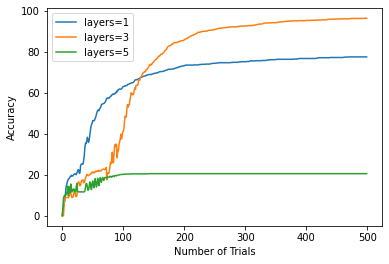

In [41]:
import matplotlib.pyplot as plt
plt.xlabel("Number of Trials")
plt.ylabel("Accuracy")
plt.plot(acc_l1)
plt.plot(acc_l3)
plt.plot(acc_l5)
plt.legend(['layers=1', 'layers=3', 'layers=5'], loc='upper left')
plt.show()

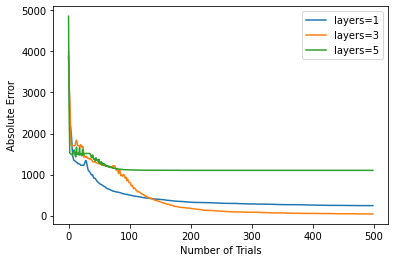

In [40]:
plt.xlabel("Number of Trials")
plt.ylabel("Absolute Error")
plt.plot(err_l1)
plt.plot(err_l3)
plt.plot(err_l5)
plt.legend(['layers=1', 'layers=3', 'layers=5'], loc='upper right')
plt.show()

# Number of Trials

In [50]:
X=x_train
Y=y_train_binary.T
Ni =785; Nh1=40; Nh2=40; Nh3=40; No=8;
Ntrials=100
alpha = 0.001
n=train_size
momentum = 0.9

In [51]:
err_t1=np.array([])
err_t2=np.array([])
err_t3=np.array([])
acc_t1=np.array([])
acc_t2=np.array([])
acc_t3=np.array([])

In [52]:
wh1=np.random.randn(Nh1, Ni);
dwh1= np.zeros(wh1.shape);

wh2=np.random.randn(Nh2, Nh1);
dwh2= np.zeros(wh2.shape);

wh3=np.random.randn(Nh3, Nh2);
dwh3= np.zeros(wh3.shape);

wo=np.random.randn(No,Nh3);
dwo=np.zeros(wo.shape)

for trial in range(Ntrials):

    h1=1/(1+np.exp(-wh1@X))
    
    h2=1/(1+np.exp(-wh2@h1))

    h3=1/(1+np.exp(-wh3@h2))

    y=1/(1+np.exp(-wo@h3))

    do=y*(1-y)*(Y-y)
    dwo=momentum*dwo+do@h3.T
    wo=wo+alpha*dwo

    dh3=h3*(1-h3)*(wo.transpose()@do)
    dwh3=momentum*dwh3+dh3@h2.T
    wh3=wh3+alpha*dwh3

    dh2=h2*(1-h2)*(wh3.transpose()@dh3)
    dwh2=momentum*dwh2+dh2@h1.T
    wh2=wh2+alpha*dwh2

    dh1=h1*(1-h1)*(wh2.transpose()@dh2)
    dwh1=momentum*dwh1+dh1@X.T
    wh1=wh1+alpha*dwh1

    accuCount = np.sum(np.all(Y == np.round(y), axis = 0))
    accuCount =  ((accuCount/train_size))*100;
    
    err_t1=np.append(err_t1, np.sum(abs(Y-np.round(y))))
    acc_t1=np.append(acc_t1, accuCount)

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/train_size))*100;
print(accuracy)
err_t1[-1]

71.875


375.0

In [53]:
Ntrials=500

In [54]:
wh1=np.random.randn(Nh1, Ni);
dwh1= np.zeros(wh1.shape);

wh2=np.random.randn(Nh2, Nh1);
dwh2= np.zeros(wh2.shape);

wh3=np.random.randn(Nh3, Nh2);
dwh3= np.zeros(wh3.shape);

wo=np.random.randn(No,Nh3);
dwo=np.zeros(wo.shape)

for trial in range(Ntrials):

    h1=1/(1+np.exp(-wh1@X))
    
    h2=1/(1+np.exp(-wh2@h1))

    h3=1/(1+np.exp(-wh3@h2))

    y=1/(1+np.exp(-wo@h3))

    do=y*(1-y)*(Y-y)
    dwo=momentum*dwo+do@h3.T
    wo=wo+alpha*dwo

    dh3=h3*(1-h3)*(wo.transpose()@do)
    dwh3=momentum*dwh3+dh3@h2.T
    wh3=wh3+alpha*dwh3

    dh2=h2*(1-h2)*(wh3.transpose()@dh3)
    dwh2=momentum*dwh2+dh2@h1.T
    wh2=wh2+alpha*dwh2

    dh1=h1*(1-h1)*(wh2.transpose()@dh2)
    dwh1=momentum*dwh1+dh1@X.T
    wh1=wh1+alpha*dwh1

    accuCount = np.sum(np.all(Y == np.round(y), axis = 0))
    accuCount =  ((accuCount/train_size))*100;
    
    err_t2=np.append(err_t2, np.sum(abs(Y-np.round(y))))
    acc_t2=np.append(acc_t2, accuCount)

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/train_size))*100;
print(accuracy)
err_t2[-1]

98.6328125


16.0

In [55]:
Ntrials=1000

In [56]:
wh1=np.random.randn(Nh1, Ni);
dwh1= np.zeros(wh1.shape);

wh2=np.random.randn(Nh2, Nh1);
dwh2= np.zeros(wh2.shape);

wh3=np.random.randn(Nh3, Nh2);
dwh3= np.zeros(wh3.shape);

wo=np.random.randn(No,Nh3);
dwo=np.zeros(wo.shape)

for trial in range(Ntrials):

    h1=1/(1+np.exp(-wh1@X))
    
    h2=1/(1+np.exp(-wh2@h1))

    h3=1/(1+np.exp(-wh3@h2))

    y=1/(1+np.exp(-wo@h3))

    do=y*(1-y)*(Y-y)
    dwo=momentum*dwo+do@h3.T
    wo=wo+alpha*dwo

    dh3=h3*(1-h3)*(wo.transpose()@do)
    dwh3=momentum*dwh3+dh3@h2.T
    wh3=wh3+alpha*dwh3

    dh2=h2*(1-h2)*(wh3.transpose()@dh3)
    dwh2=momentum*dwh2+dh2@h1.T
    wh2=wh2+alpha*dwh2

    dh1=h1*(1-h1)*(wh2.transpose()@dh2)
    dwh1=momentum*dwh1+dh1@X.T
    wh1=wh1+alpha*dwh1

    accuCount = np.sum(np.all(Y == np.round(y), axis = 0))
    accuCount =  ((accuCount/train_size))*100;
    
    err_t3=np.append(err_t3, np.sum(abs(Y-np.round(y))))
    acc_t3=np.append(acc_t3, accuCount)

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/train_size))*100;
print(accuracy)
err_t3[-1]

98.4375


16.0

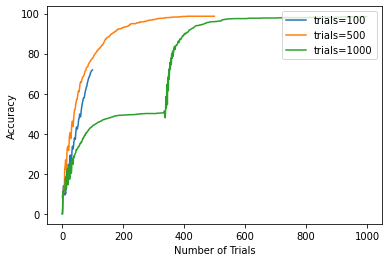

In [58]:
import matplotlib.pyplot as plt
plt.xlabel("Number of Trials")
plt.ylabel("Accuracy")
plt.plot(acc_t1)
plt.plot(acc_t2)
plt.plot(acc_t3)
plt.legend(['trials=100', 'trials=500', 'trials=1000'], loc='upper right')
plt.show()

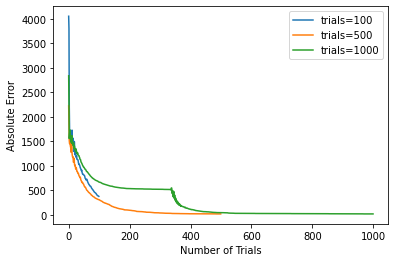

In [59]:
plt.xlabel("Number of Trials")
plt.ylabel("Absolute Error")
plt.plot(err_t1)
plt.plot(err_t2)
plt.plot(err_t3)
plt.legend(['trials=100', 'trials=500', 'trials=1000'], loc='upper right')
plt.show()

# Testing

In [203]:
X=x_train
Y=y_train_binary.T
Ni =785; Nh1=40; Nh2=40; Nh3=40; No=8;
Ntrials=500
alpha = 0.001
n=train_size
momentum = 0.9

In [204]:
err_final=np.array([])
acc_final=np.array([])

In [205]:
wh1=np.random.randn(Nh1, Ni);
dwh1= np.zeros(wh1.shape);

wh2=np.random.randn(Nh2, Nh1);
dwh2= np.zeros(wh2.shape);

wh3=np.random.randn(Nh3, Nh2);
dwh3= np.zeros(wh3.shape);

wo=np.random.randn(No,Nh3);
dwo=np.zeros(wo.shape)

for trial in range(Ntrials):

    h1=1/(1+np.exp(-wh1@X))
    
    h2=1/(1+np.exp(-wh2@h1))

    h3=1/(1+np.exp(-wh3@h2))

    y=1/(1+np.exp(-wo@h3))

    do=y*(1-y)*(Y-y)
    dwo=momentum*dwo+do@h3.T
    wo=wo+alpha*dwo

    dh3=h3*(1-h3)*(wo.transpose()@do)
    dwh3=momentum*dwh3+dh3@h2.T
    wh3=wh3+alpha*dwh3

    dh2=h2*(1-h2)*(wh3.transpose()@dh3)
    dwh2=momentum*dwh2+dh2@h1.T
    wh2=wh2+alpha*dwh2

    dh1=h1*(1-h1)*(wh2.transpose()@dh2)
    dwh1=momentum*dwh1+dh1@X.T
    wh1=wh1+alpha*dwh1

    accuCount = np.sum(np.all(Y == np.round(y), axis = 0))
    accuCount =  ((accuCount/train_size))*100;
    
    err_final=np.append(err_final, np.sum(abs(Y-np.round(y))))
    acc_final=np.append(acc_final, accuCount)

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/train_size))*100;
print(accuracy)
err_final[-1]

79.6875


211.0

In [206]:
X_test = x_test
Y_test=y_test_binary.T

h1=1/(1+np.exp(-wh1@X_test))
    
h2=1/(1+np.exp(-wh2@h1))

h3=1/(1+np.exp(-wh3@h2))

y_test_predicted=1/(1+np.exp(-wo@h3))


err_pre = np.sum(abs(Y_test-y_test_predicted))

accuracy_pre = np.sum(np.all(Y_test == np.round(y_test_predicted), axis = 0))
accuracy_pre =  ((accuracy_pre/train_size))*100;
print(err_pre)
print(accuracy_pre)

736.3043719569393
53.80859375


In [207]:
import cv2
# Blur 
x_test_noise = cv2.GaussianBlur(x_test,(5,5), 0)


h1=1/(1+np.exp(-wh1@x_test_noise))
    
h2=1/(1+np.exp(-wh2@h1))

h3=1/(1+np.exp(-wh3@h2))

y_test_predicted_noise=1/(1+np.exp(-wo@h3))

err_pre_noise = np.sum(abs(Y_test-y_test_predicted_noise))

accuracy_noise = np.sum(np.all(Y_test == np.round(y_test_predicted_noise), axis = 0))
accuracy_noise =  ((accuracy_noise/train_size))*100;
print(err_pre_noise)
print(accuracy_noise)

1239.8758080794596
24.51171875


# Regularization

L2 regularization

In [208]:
X=x_train
Y=y_train_binary.T
Ni =785; Nh1=40; Nh2=40; Nh3=40; No=8;
Ntrials=500
alpha = 0.001
Lambda=0.001
n=train_size
momentum = 0.9

In [209]:
err_l2=np.array([])
err_l1=np.array([])
acc_l2=np.array([])
acc_l1=np.array([])

In [210]:
wh1=np.random.randn(Nh1, Ni);
dwh1= np.zeros(wh1.shape);

wh2=np.random.randn(Nh2, Nh1);
dwh2= np.zeros(wh2.shape);

wh3=np.random.randn(Nh3, Nh2);
dwh3= np.zeros(wh3.shape);

wo=np.random.randn(No,Nh3);
dwo=np.zeros(wo.shape)

for trial in range(Ntrials):

    h1=1/(1+np.exp(-wh1@X))
    
    h2=1/(1+np.exp(-wh2@h1))

    h3=1/(1+np.exp(-wh3@h2))

    y=1/(1+np.exp(-wo@h3))

    do=y*(1-y)*(Y-y)
    dwo=momentum*dwo+do@h3.T + 2*Lambda*wo
    wo=wo+alpha*dwo

    dh3=h3*(1-h3)*(wo.transpose()@do)
    dwh3=momentum*dwh3+dh3@h2.T + 2*Lambda*wh3
    wh3=wh3+alpha*dwh3

    dh2=h2*(1-h2)*(wh3.transpose()@dh3)
    dwh2=momentum*dwh2+dh2@h1.T + 2*Lambda*wh2
    wh2=wh2+alpha*dwh2

    dh1=h1*(1-h1)*(wh2.transpose()@dh2)
    dwh1=momentum*dwh1+dh1@X.T + 2*Lambda*wh1
    wh1=wh1+alpha*dwh1

    accuCount = np.sum(np.all(Y == np.round(y), axis = 0))
    accuCount =  ((accuCount/train_size))*100;

    L2_regularization = (Lambda/2) * (np.sum(np.square(wo)) + np.sum(np.square(wh1))+ 
                                                                     np.sum(np.square(wh2))+ np.sum(np.square(wh3)))
    
    err_l2 =np.append(err_l2, np.sum(abs(Y-np.round(y))) + L2_regularization)
    acc_l2=np.append(acc_l2, accuCount)

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/train_size))*100;
print(accuracy)
err_l2[-1]

80.078125


231.14034850104733

In [211]:
X_test = x_test
Y_test=y_test_binary.T

h1=1/(1+np.exp(-wh1@X_test))
    
h2=1/(1+np.exp(-wh2@h1))

h3=1/(1+np.exp(-wh3@h2))

y_test_predicted=1/(1+np.exp(-wo@h3))


err_pre = np.sum(abs(Y_test-y_test_predicted))

accuracy_pre = np.sum(np.all(Y_test == np.round(y_test_predicted), axis = 0))
accuracy_pre =  ((accuracy_pre/train_size))*100;
print(err_pre)
print(accuracy_pre)

767.6228699672556
51.5625


L1 regularization


In [212]:
wh1=np.random.randn(Nh1, Ni);
dwh1= np.zeros(wh1.shape);

wh2=np.random.randn(Nh2, Nh1);
dwh2= np.zeros(wh2.shape);

wh3=np.random.randn(Nh3, Nh2);
dwh3= np.zeros(wh3.shape);

wo=np.random.randn(No,Nh3);
dwo=np.zeros(wo.shape)

for trial in range(Ntrials):

    h1=1/(1+np.exp(-wh1@X))
    
    h2=1/(1+np.exp(-wh2@h1))

    h3=1/(1+np.exp(-wh3@h2))

    y=1/(1+np.exp(-wo@h3))

    do=y*(1-y)*(Y-y)
    dwo=momentum*dwo+do@h3.T + Lambda
    wo=wo+alpha*dwo

    dh3=h3*(1-h3)*(wo.transpose()@do)
    dwh3=momentum*dwh3+dh3@h2.T + Lambda
    wh3=wh3+alpha*dwh3

    dh2=h2*(1-h2)*(wh3.transpose()@dh3)
    dwh2=momentum*dwh2+dh2@h1.T + Lambda
    wh2=wh2+alpha*dwh2

    dh1=h1*(1-h1)*(wh2.transpose()@dh2)
    dwh1=momentum*dwh1+dh1@X.T + Lambda
    wh1=wh1+alpha*dwh1

    accuCount = np.sum(np.all(Y == np.round(y), axis = 0))
    accuCount =  ((accuCount/train_size))*100;

    L1_regularization = (Lambda/2) * (np.sum(np.abs(wo)) + np.sum(np.abs(wh1))+ 
                                                                     np.sum(np.abs(wh2))+ np.abs(np.abs(wh3)))
    
    err_l1=np.append(err_l1, np.sum(abs(Y-np.round(y))) + L2_regularization)
    acc_l1=np.append(acc_l1, accuCount)

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/train_size))*100;
print(accuracy)
err_l1[-1]

98.2421875


38.14034850104733

In [213]:
X_test = x_test
Y_test=y_test_binary.T

h1=1/(1+np.exp(-wh1@X_test))
    
h2=1/(1+np.exp(-wh2@h1))

h3=1/(1+np.exp(-wh3@h2))

y_test_predicted=1/(1+np.exp(-wo@h3))


err_pre = np.sum(abs(Y_test-y_test_predicted))

accuracy_pre = np.sum(np.all(Y_test == np.round(y_test_predicted), axis = 0))
accuracy_pre =  ((accuracy_pre/train_size))*100;
print(err_pre)
print(accuracy_pre)

684.3279410810276
61.23046875


In [214]:
import cv2
# Blur 
x_test_noise = cv2.GaussianBlur(x_test,(5,5), 0)


h1=1/(1+np.exp(-wh1@x_test_noise))
    
h2=1/(1+np.exp(-wh2@h1))

h3=1/(1+np.exp(-wh3@h2))

y_test_predicted_noise=1/(1+np.exp(-wo@h3))

err_pre_noise = np.sum(abs(Y_test-y_test_predicted_noise))

accuracy_noise = np.sum(np.all(Y_test == np.round(y_test_predicted_noise), axis = 0))
accuracy_noise =  ((accuracy_noise/train_size))*100;
print(err_pre_noise)
print(accuracy_noise)

1315.6065537467127
29.98046875


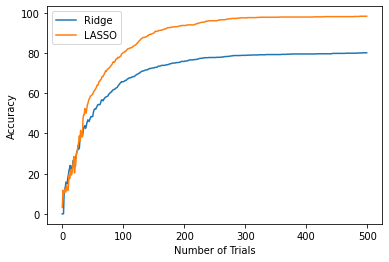

In [216]:
import matplotlib.pyplot as plt
plt.xlabel("Number of Trials")
plt.ylabel("Accuracy")
plt.plot(acc_l2)
plt.plot(acc_l1)
plt.legend(['Ridge', 'LASSO'], loc='upper left')
plt.show()

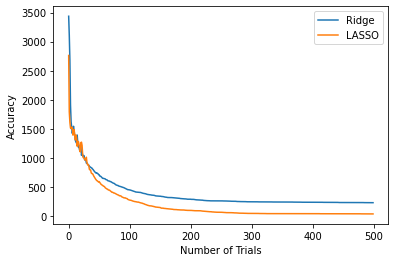

In [217]:
import matplotlib.pyplot as plt
plt.xlabel("Number of Trials")
plt.ylabel("Accuracy")
plt.plot(err_l2)
plt.plot(err_l1)
plt.legend(['Ridge', 'LASSO'], loc='upper right')
plt.show()